In [1]:
import scanpy as sc
adata=sc.read("data/adata_tree.h5ad")

In [2]:
import scFates as scf

In [3]:
r="NCC2"
m=["ChC","GutGlia"]

In [4]:
scf.tl.subset_tree(adata,root_milestone=r,milestones=m)

subsetting tree
node 375 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:03) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.
    finished (0:00:00) --> tree extracted
--> added 
    .obs['old_milestones'], previous milestones from intial tree


In [5]:
scf.tl.dendrogram(adata,crowdedness=.1)

Generating dendrogram of tree
    segment : 100%|██████████| 3/3 [00:00<00:00,  4.48it/s]
    finished (0:00:00) --> added 
    .obsm['X_dendro'], new embedding generated.
    .uns['dendro_segments'] tree segments used for plotting.


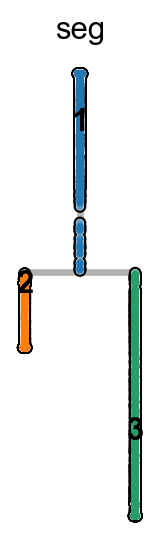

In [6]:
sc.set_figure_params(figsize=(1,4),frameon=False)
scf.pl.dendrogram(adata,color="seg",legend_loc="on data",tree_behind=True,add_outline=True,clip_on=False,show_info=False)

In [7]:
maxt=adata.obs.t[adata.obs.seg=="2"].max()

In [8]:
scf.tl.subset_tree(adata,mode="pseudotime",t_max=maxt)

subsetting tree
node 283 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:03) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.
    finished (0:00:00) --> tree subsetted


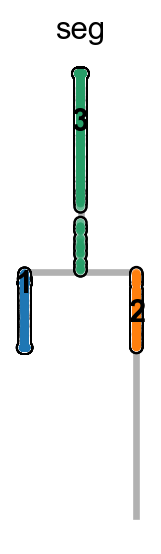

In [9]:
scf.pl.dendrogram(adata,color="seg",legend_loc="on data",tree_behind=True,add_outline=True,clip_on=False,show_info=False)

In [10]:
scf.tl.pseudotime(adata,n_jobs=40,n_map=100)

projecting cells onto the principal graph
    mappings: 100%|██████████| 100/100 [00:28<00:00,  3.55it/s]
    finished (0:00:28) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


In [11]:
scf.tl.dendrogram(adata,crowdedness=.1)

Generating dendrogram of tree
    segment : 100%|██████████| 3/3 [00:00<00:00,  6.08it/s]
    finished (0:00:00) --> added 
    .obsm['X_dendro'], new embedding generated.
    .uns['dendro_segments'] tree segments used for plotting.


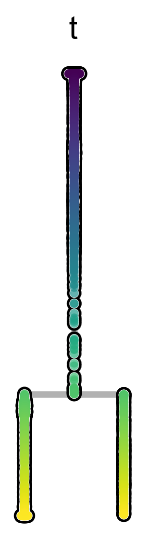

In [12]:
sc.set_figure_params(figsize=(1,4),frameon=False)
scf.pl.dendrogram(adata,color="t",tree_behind=True,add_outline=True,clip_on=False,show_info=False)

In [13]:
scf.tl.test_association(adata,n_jobs=40)

test features for association with the trajectory
    single mapping : 100%|██████████| 21676/21676 [01:53<00:00, 191.45it/s]
    found 4257 significant features (0:01:53) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.


In [14]:
scf.tl.fit(adata,n_jobs=40)

fit features associated with the trajectory
    single mapping : 100%|██████████| 4257/4257 [00:52<00:00, 80.58it/s]
    finished (adata subsetted to keep only fitted features!) (0:00:58) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


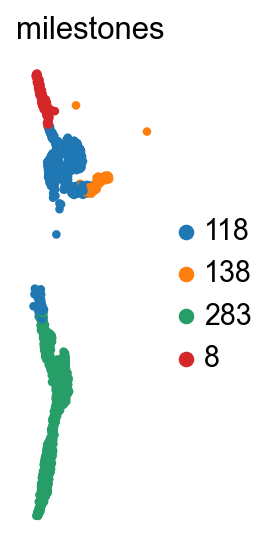

In [15]:
sc.pl.umap(adata,color="milestones")

In [16]:
scf.tl.rename_milestones(adata,["bifurcation","SA progenitors","NCCs","Enteric Glia"])

In [17]:
r="NCCs"
m=["SA progenitors","Enteric Glia"]

In [18]:
scf.tl.test_fork(adata,r,m,n_jobs=40)

testing fork
    single mapping


/home/lfaure/scFates/scFates/tools/bifurcation_tools.py:157: FutureWarning: In a future version of pandas all arguments of Index.drop_duplicates will be keyword-only
  brcells = brcells.loc[brcells.index.drop_duplicates(False)]


    Differential expression: 100%|██████████| 4257/4257 [00:14<00:00, 288.79it/s]
    test for upregulation for each leave vs root
    upreg Enteric Glia: 100%|██████████| 1074/1074 [00:01<00:00, 588.31it/s]
    finished (0:00:23) --> added 
    .uns['NCCs->SA progenitors<>Enteric Glia']['fork'], DataFrame with fork test results.


In [19]:
scf.tl.branch_specific(adata,r,m,effect=.7)

    branch specific features: SA progenitors: 191, Enteric Glia: 65
    finished --> updated 
    .uns['NCCs->SA progenitors<>Enteric Glia']['fork'], DataFrame updated with additionnal 'branch' column.


In [20]:
#scf.tl.activation(adata,r,m,n_jobs=20,nwin=10,deriv_cut=.3,pseudotime_offset=0.005)
scf.tl.activation(adata,r,m,n_jobs=20,nwin=10,deriv_cut=.2,pseudotime_offset=0.006)

testing activation
    to Enteric Glia: 100%|██████████| 65/65 [00:01<00:00, 59.56it/s]
    threshold pseudotime is: 0.0429749631633998
    64 early and 127 late features specific to leave SA progenitors
    52 early and 13 late features specific to leave Enteric Glia
    finished (0:00:24) --> updated 
    .uns['NCCs->SA progenitors<>Enteric Glia']['fork'], DataFrame updated with additionnal 'activation' and 'module' columns.


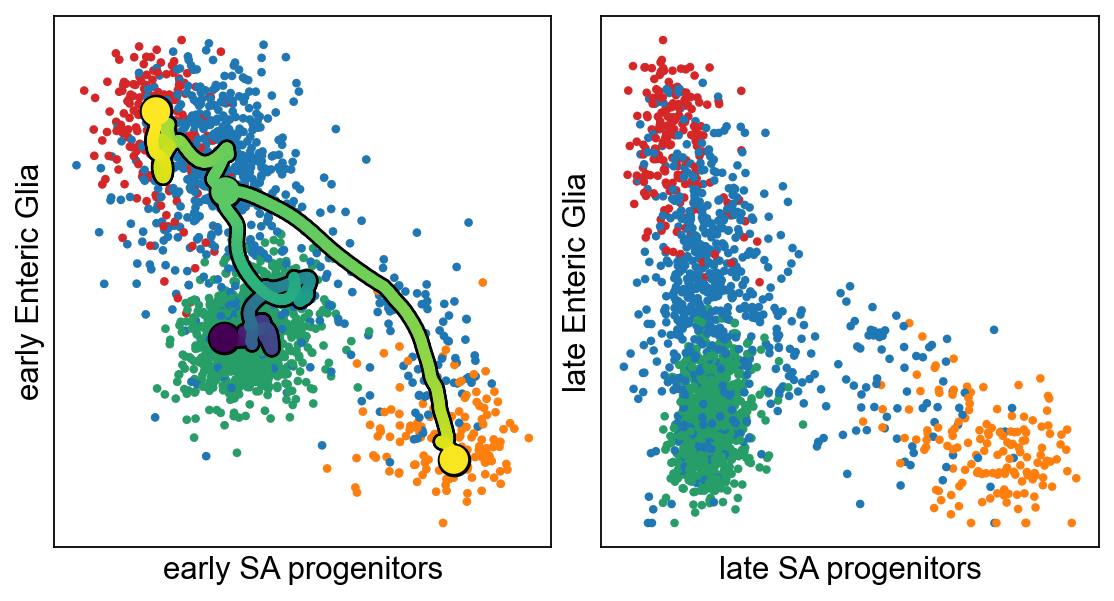

In [21]:
sc.set_figure_params()
scf.pl.modules(adata,r,m,show_traj=True)

In [22]:
scf.get.fork_stats(adata,r,m).loc["Nfasc"]

Enteric Glia           -1.523271
SA progenitors               0.0
de_p                         0.0
fdr                          0.0
signi_p                      1.0
signi_fdr                    1.0
up_A                   30.341148
up_p                         0.0
branch            SA progenitors
activation               0.04789
module                      late
Name: Nfasc, dtype: object

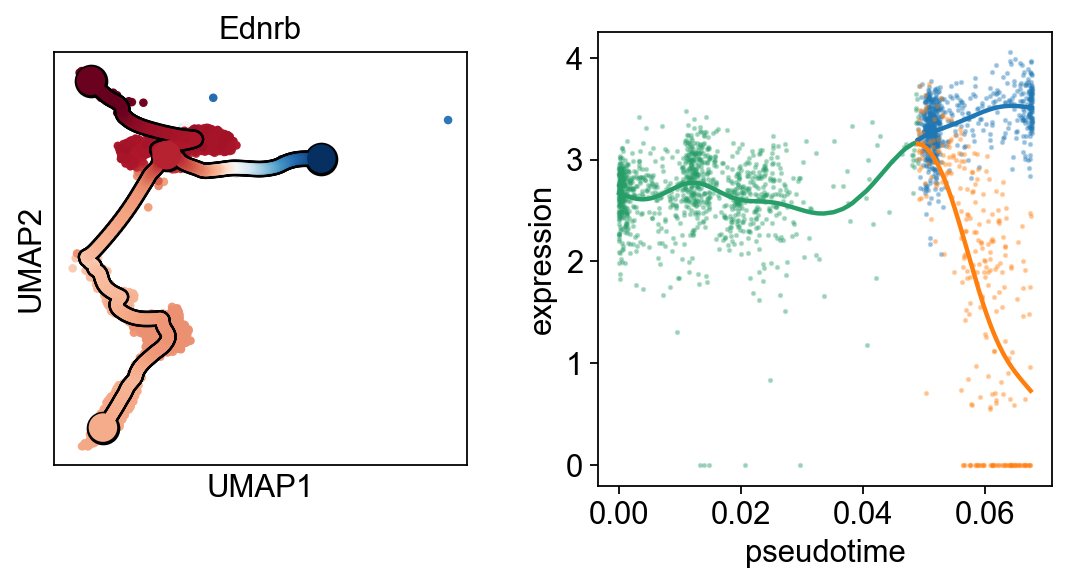

In [23]:
scf.pl.single_trend(adata,"Ednrb")

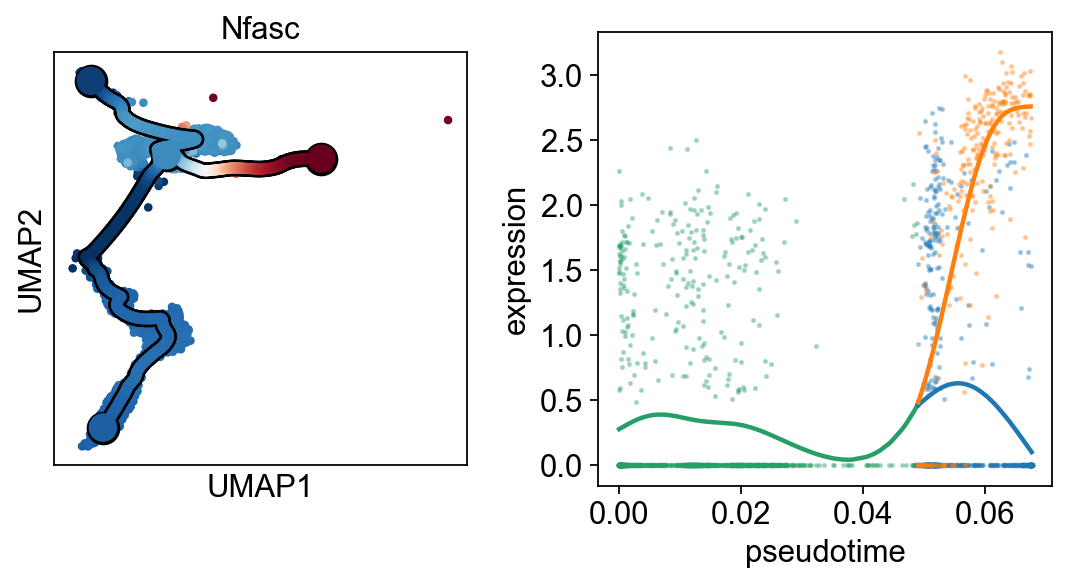

In [24]:
scf.pl.single_trend(adata,"Nfasc")

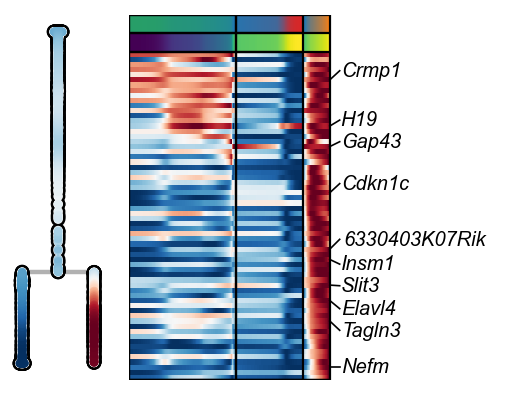

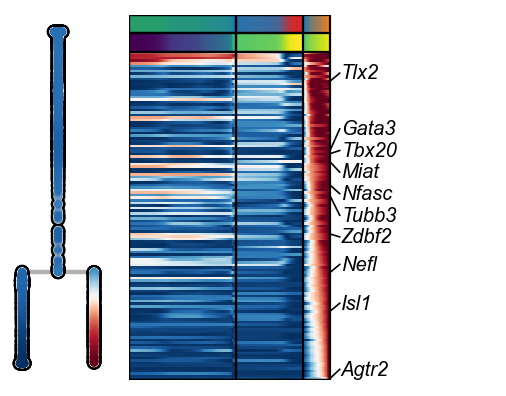

In [25]:
sc.set_figure_params(figsize=(1,4))

scf.pl.trends(adata,root_milestone=r,milestones=m,basis="dendro",frameon=False,tree_behind=True,add_outline=True,
              module="early",branch=m[0],ordering="max",clip_on=False,wspace=0.1,style="italic",
              figsize=(3.8,3),heatmap_space=.2,offset_names=.05,linewidth_seg=2,annot="milestones")

scf.pl.trends(adata,root_milestone=r,milestones=m,basis="dendro",frameon=False,tree_behind=True,add_outline=True,
              module="late",branch=m[0],ordering="max",clip_on=False,wspace=0.1,style="italic",
              figsize=(3.8,3),heatmap_space=.2,offset_names=.05,linewidth_seg=2,annot="milestones")

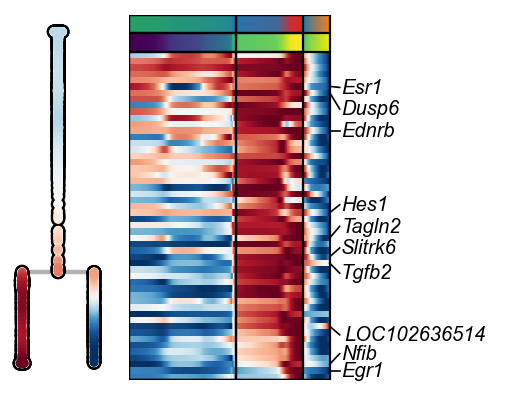

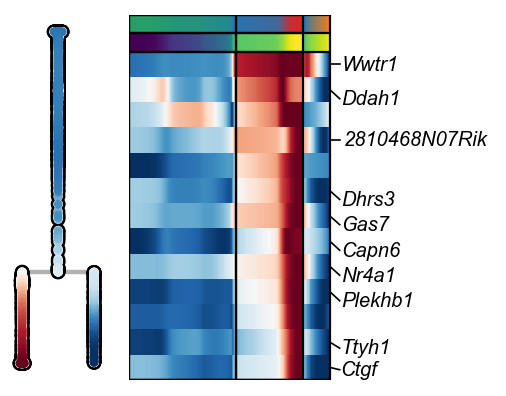

In [27]:
scf.pl.trends(adata,root_milestone=r,milestones=m,basis="dendro",frameon=False,tree_behind=True,add_outline=True,
              module="early",branch=m[1],ordering="max",clip_on=False,wspace=0.1,style="italic",
              figsize=(3.8,3),heatmap_space=.2,offset_names=.05,linewidth_seg=2,annot="milestones")

scf.pl.trends(adata,root_milestone=r,milestones=m,basis="dendro",frameon=False,tree_behind=True,add_outline=True,
              module="late",branch=m[1],ordering="max",clip_on=False,wspace=0.1,style="italic",
              figsize=(3.8,3),heatmap_space=.2,offset_names=.05,linewidth_seg=2,annot="milestones")

In [28]:
scf.tl.slide_cells(adata,r,m,win=100)

--> added 
    .uns['NCCs->SA progenitors<>Enteric Glia']['cell_freq'], probability assignment of cells on 22 non intersecting windows.


In [29]:
scf.tl.slide_cors(adata,r,m)

--> added 
    .uns['NCCs->SA progenitors<>Enteric Glia']['corAB'], gene-gene correlation modules.


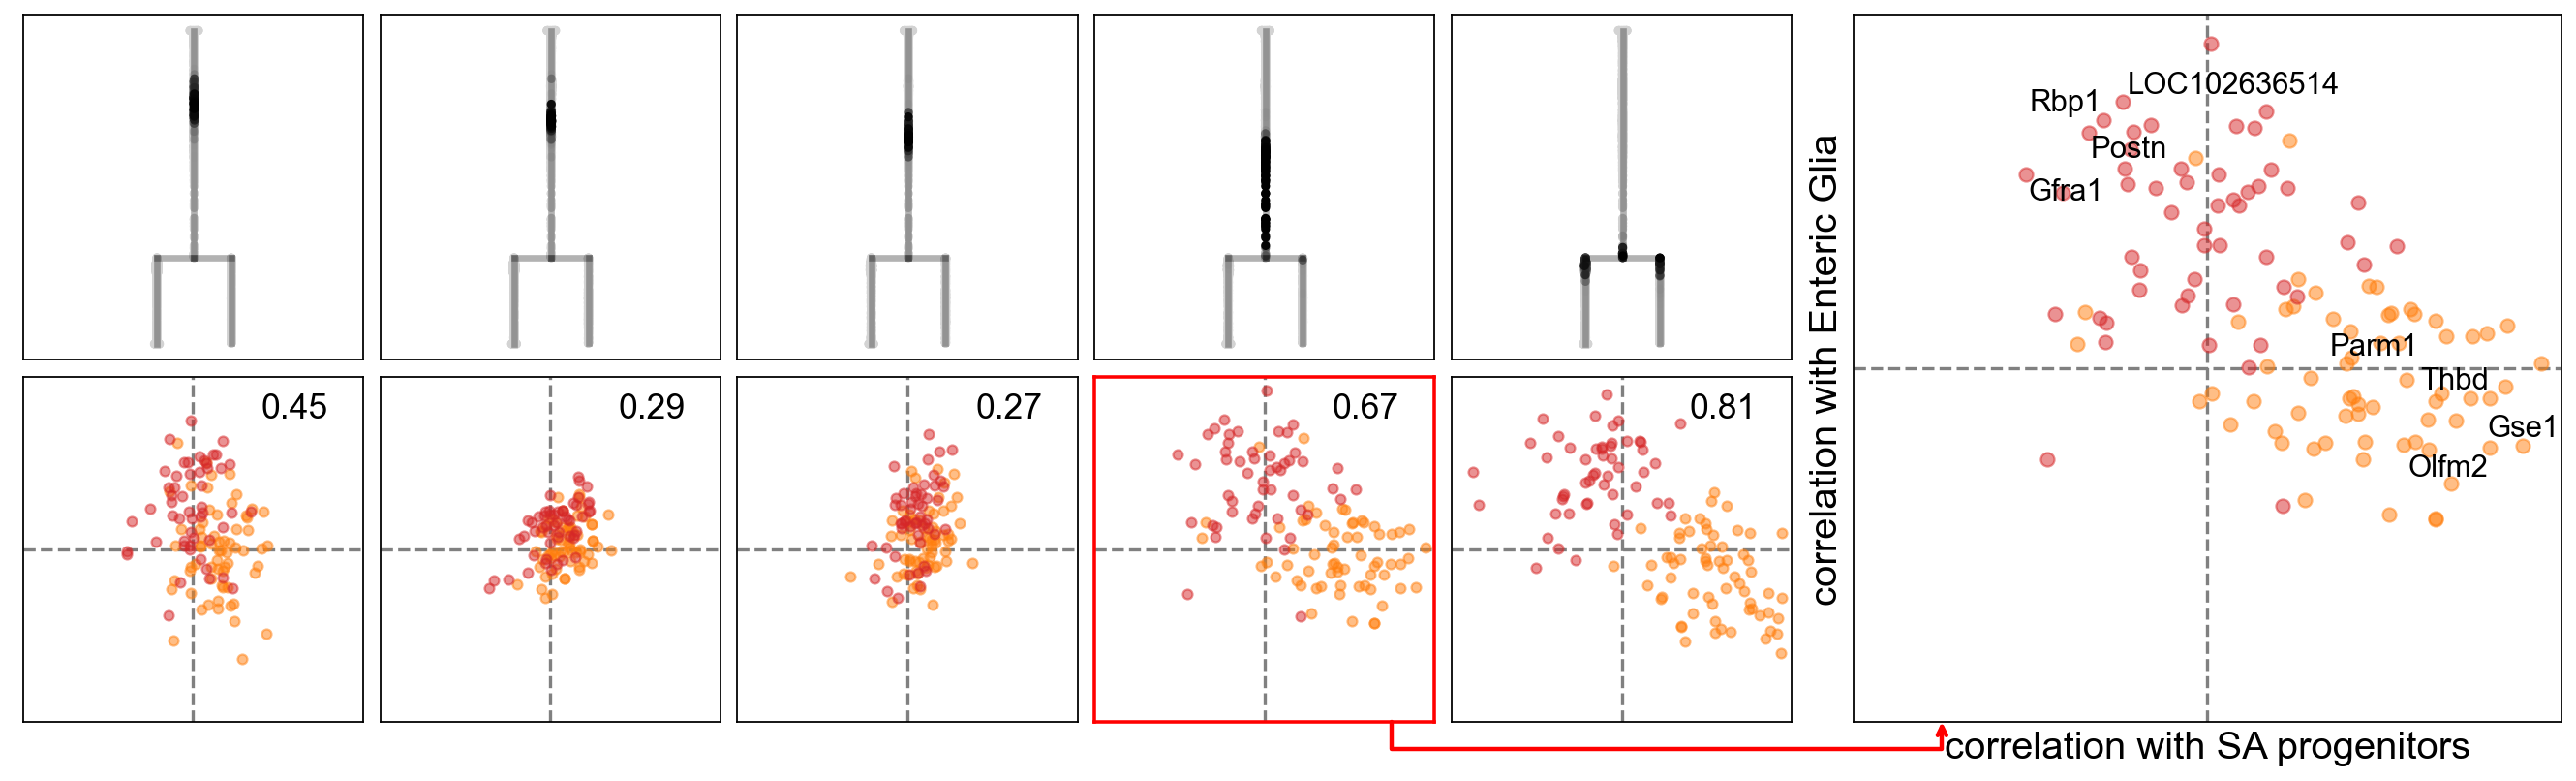

In [30]:
scf.pl.slide_cors(adata,r,m,basis="dendro",win_keep=range(7,12),focus=3)

In [31]:
scf.tl.synchro_path(adata,r,m,winp=10,w=20,step=10)

computing local correlations
    single mapping
    to Enteric Glia: 100%|██████████| 173/173 [00:02<00:00, 76.17it/s]
    finished (0:00:10) --> added 
    .uns['NCCs->SA progenitors<>Enteric Glia']['synchro'], mean local gene-gene correlations of all possible gene pairs inside one module, or between the two modules.
    .obs['inter_cor NCCs->SA progenitors<>Enteric Glia'], GAM fit of inter-module mean local gene-gene correlations prior to bifurcation.


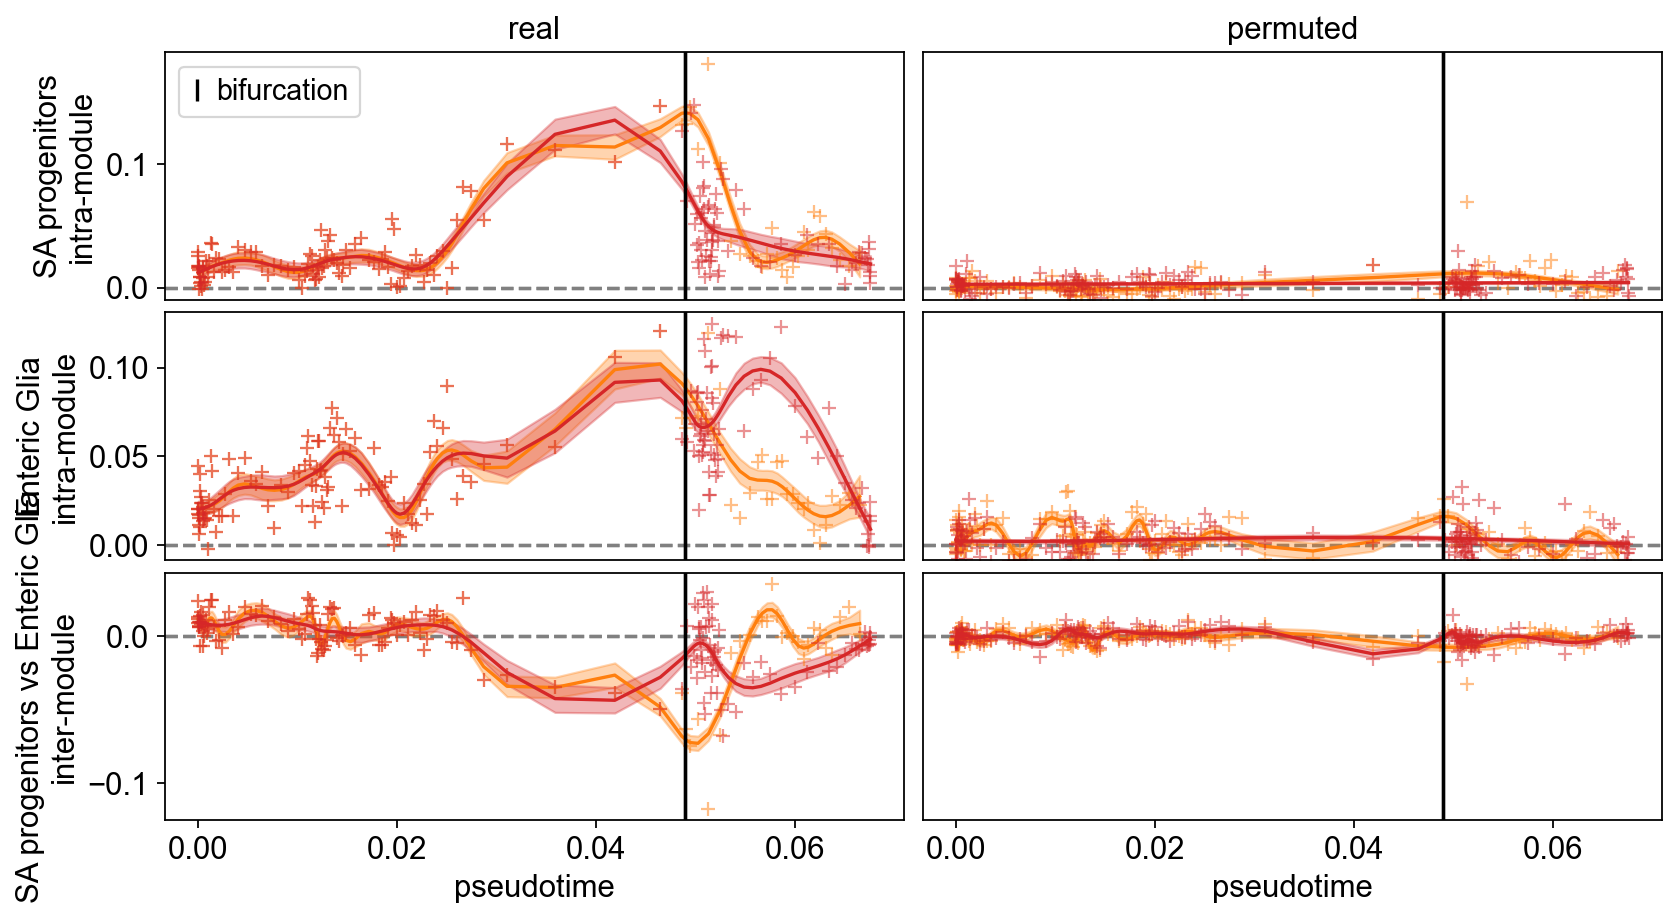

In [32]:
scf.pl.synchro_path(adata,r,m,knots=30)

In [33]:
scf.tl.synchro_path(adata,r,m,winp=10,w=20,step=10,n_jobs=80,n_map=100)

computing local correlations
    multi mapping permutations: 100%|██████████| 100/100 [00:36<00:00,  2.73it/s]
    finished (0:01:42) --> added 
    .uns['NCCs->SA progenitors<>Enteric Glia']['synchro'], mean local gene-gene correlations of all possible gene pairs inside one module, or between the two modules.
    .obs['inter_cor NCCs->SA progenitors<>Enteric Glia'], GAM fit of inter-module mean local gene-gene correlations prior to bifurcation.


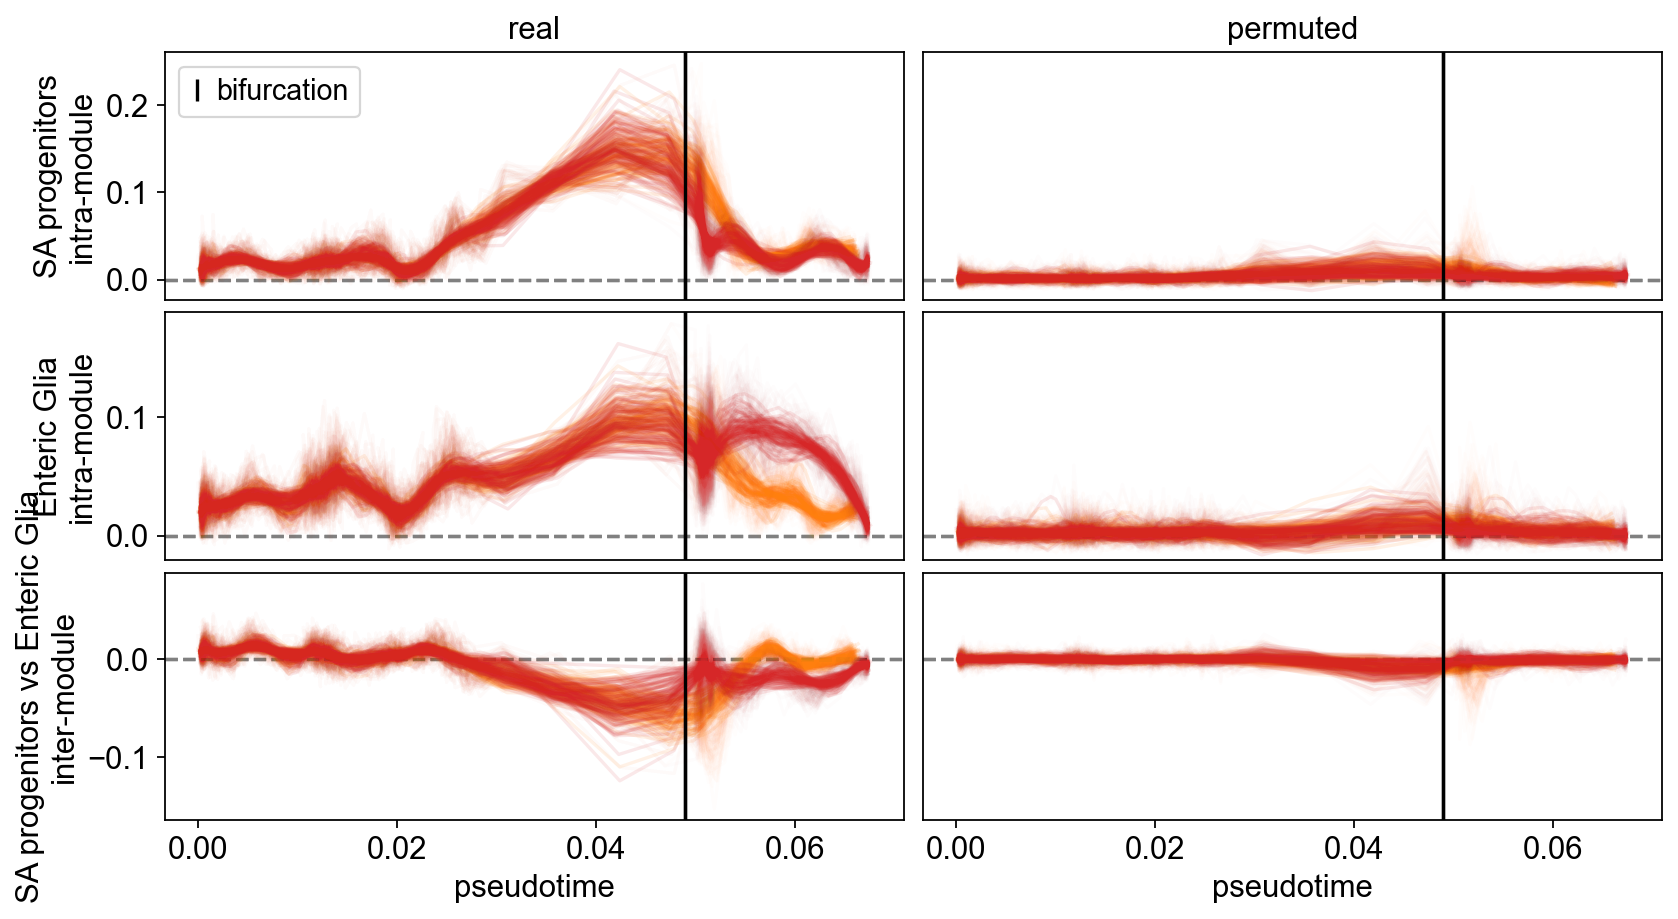

In [34]:
scf.pl.synchro_path(adata,r,m,knots=30)

In [35]:
adata.write("data/adata_bif_SAGutGlia.h5ad")